# Group Project - Dognition
this notebook is for exploring dogniton data
#    II. How do the features of the owners correlate to the number of tests completed?
#        2.1) Personality traits? Knowledge-seeking or easily bored?
#        2.2) Demographics: education, socioeconomic status, age?
#        2.3) Dog history, such as dog ownership, interest in breeding, # of dogs owned now or in a lifetime, etc …
Some of the tools provided that I found useful in analyzing the Dognition data set were SQL and Excel, which helped in organizing and arranging the data sets and provided the tools to identify any related sources that can increase the completed dognition tests related to the owners of tested dogs. After exploring the Dognition data sets, something I found interesting regarded the breeds of dogs being mixed. Some of the dogs with known mixed breeds are classified with either one breed or the other alphabetically, in order to not duplicate. Some dogs are just stated to be mixed and are part of a broader and undefinable group. I am interested in finding out how the behavior and test results performed by the mixed-dog breeds category compare to the behaviors and test scores gathered from other dog breeds and how their owners impact these scores. Our team will be using the Jupyter notebook and Python language to further analyze and communicate our team's findings regarding the questions provided for the Dognition data set.
-Isabella Barboza

In [35]:
#set up of requirements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 as sql
import os
import openpyxl

In [59]:
import os
print(os.getcwd())

/Users/Bella/Desktop/DS_311/DataXperts/ibdognition2.3


In [63]:
#establish connection to data
con = sqlite3.connect('./python.db')
print("Connection successful!")
dogdf = pd.read_excel('/Users/Bella/Desktop/DS_311/DataXperts/ibdognition2.3/dognition_data_aggregated_by_dogid.xlsx')
con.close()

Connection successful!


In [65]:
type(dogdf)


pandas.core.frame.DataFrame

In [67]:
dogdf

,Dog ID,Total Tests Completed,Mean ITI (days),Mean ITI (minutes),Median ITI (days),Median ITI (minutes),Time diff between first and last game (days),Time diff between first and last game (minutes),User ID,Gender,...,Membership_ID,Subscribed,City,State,Zip,Country,Exclude,Free_Start_User,Last_Active_At,Membership_Type
0,fd27b272-7144-11e5-ba71-058fbc01cf0b,21,28.201076,40609.549167,0.004687,6.750000,564.021516,812190.983333,ce134e42-7144-11e5-ba71-058fbc01cf0b,female,...,2.0,1.0,Grand Forks,ND,58201,US,0,0,2015-03-12 00:25:00,2
1,fd27b5ba-7144-11e5-ba71-058fbc01cf0b,20,0.413307,595.162281,0.005845,8.416667,7.852836,11308.083333,ce1353d8-7144-11e5-ba71-058fbc01cf0b,male,...,1.0,1.0,Barre,MA,01005,US,0,0,00:00:00,1
2,fd27b6b4-7144-11e5-ba71-058fbc01cf0b,2,0.009132,13.150000,0.009132,13.150000,0.009132,13.150000,ce135ab8-7144-11e5-ba71-058fbc01cf0b,male,...,1.0,1.0,Darien,CT,06820,US,0,0,00:00:00,1
3,fd27b79a-7144-11e5-ba71-058fbc01cf0b,11,56.115179,80805.858333,0.004433,6.383333,561.151794,808058.583333,ce13507c-7144-11e5-ba71-058fbc01cf0b,male,...,1.0,1.0,Winnetka,IL,60093,US,0,0,2014-09-12 19:26:00,1
4,fd27b86c-7144-11e5-ba71-058fbc01cf0b,31,7.734254,11137.326111,0.000399,0.575000,232.027627,334119.783333,ce135e14-7144-11e5-ba71-058fbc01cf0b,female,...,2.0,1.0,Raleigh,NC,27606,US,1,0,00:00:00,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17981,fdc235e0-7144-11e5-ba71-058fbc01cf0b,7,0.009408,13.547222,0.004786,6.891667,0.056447,81.283333,ce9b2aba-7144-11e5-ba71-058fbc01cf0b,male,...,10.0,0.0,NaN,NaN,NaN,NaN,0,0,2015-10-12 14:44:00,1
17982,fdc23a68-7144-11e5-ba71-058fbc01cf0b,1,NaN,NaN,NaN,NaN,0.000000,0.000000,ce9b2eb6-7144-11e5-ba71-058fbc01cf0b,male,...,9.0,0.0,NaN,NaN,NaN,NaN,0,1,2015-10-12 20:43:00,4
17983,fdc23ba8-7144-11e5-ba71-058fbc01cf0b,20,0.004957,7.137719,0.004201,6.050000,0.094178,135.616667,ce9b306e-7144-11e5-ba71-058fbc01cf0b,female,...,10.0,1.0,Carolina Beach,NC,28428,US,0,0,2015-10-12 20:13:00,1
17984,fdc23e96-7144-11e5-ba71-058fbc01cf0b,4,0.002948,4.244444,0.002778,4.000000,0.008843,12.733333,ce9b33b6-7144-11e5-ba71-058fbc01cf0b,female,...,9.0,0.0,NaN,NaN,NaN,NaN,0,1,2015-10-12 19:17:00,4


In [68]:
dogdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17986 entries, 0 to 17985
Data columns (total 30 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Dog ID                                           17986 non-null  object 
 1   Total Tests Completed                            17986 non-null  int64  
 2   Mean ITI (days)                                  16718 non-null  float64
 3   Mean ITI (minutes)                               16718 non-null  float64
 4   Median ITI (days)                                16718 non-null  float64
 5   Median ITI (minutes)                             16718 non-null  float64
 6   Time diff between first and last game (days)     17986 non-null  float64
 7   Time diff between first and last game (minutes)  17986 non-null  float64
 8   User ID                                          17985 non-null  object 
 9   Gender                      

In [69]:
dogdf.describe()

,Total Tests Completed,Mean ITI (days),Mean ITI (minutes),Median ITI (days),Median ITI (minutes),Time diff between first and last game (days),Time diff between first and last game (minutes),Birthday,Weight,Dog_Fixed,DNA_Tested,Sign_in_Count,Max_Dogs,Membership_ID,Subscribed
count,17986.000000,1.671800e+04,16718.000000,16718.000000,16718.000000,17986.000000,1.798600e+04,17985.000000,17985.000000,17985.000000,17985.000000,17985.000000,17985.000000,17985.000000,17985.000000
mean,9.807239,2.300726e+00,3313.045589,0.275986,397.420037,25.140728,3.620265e+04,2009.932388,41.485683,0.850876,0.036697,8.329386,1.273450,7.411565,0.549124
std,7.799484,1.011768e+01,14569.464530,7.182127,10342.262528,75.788752,1.091358e+05,3.341993,29.380373,0.356221,0.188023,68.940494,1.466773,3.938681,0.497595
min,1.000000,6.091646e-07,0.000877,0.000000,0.000000,0.000000,0.000000e+00,1982.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,3.719136e-03,5.355556,0.002998,4.316667,0.009343,1.345417e+01,2008.000000,20.000000,1.000000,0.000000,2.000000,1.000000,2.000000,0.000000
50%,7.000000,1.466368e-01,211.157051,0.003895,5.608333,0.724473,1.043242e+03,2011.000000,40.000000,1.000000,0.000000,3.000000,1.000000,10.000000,1.000000
75%,16.000000,1.226744e+00,1766.511404,0.005012,7.216667,11.890451,1.712225e+04,2012.000000,60.000000,1.000000,0.000000,6.000000,1.000000,10.000000,1.000000
max,45.000000,6.509563e+02,937377.016667,650.956262,937377.016667,960.560440,1.383207e+06,2015.000000,190.000000,1.000000,1.000000,1695.000000,36.000000,17.000000,1.000000


In [ ]:
#2.1 Personality traits? Knowledge-seeking or easily bored?

In [ ]:
#2.2 Demographics: education, socioeconomic status, age?

In [ ]:
#2.3 Dog history, such as dog ownership, interest in breeding, # of dogs owned now or in a lifetime, etc …

AttributeError: Rectangle.set() got an unexpected keyword argument 'row'

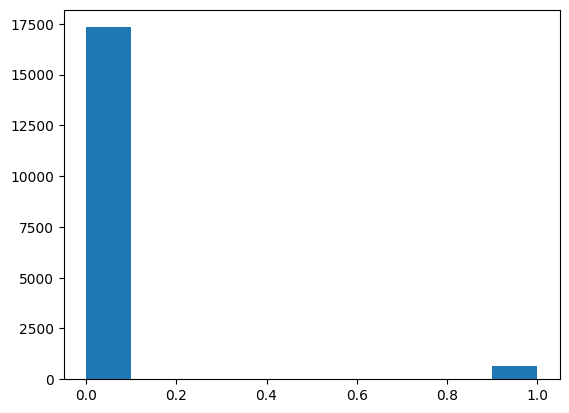

In [82]:
dogdf.hist(column= 'DNA_Tested', row= 'Max_Dogs')

In [79]:
dogdf = pd.DataFrame(
    dogdf['Breed_Type'].fillna('') + '' +
    dogdf['Breed_Group'].fillna(''))

dogdf.columns = ['Combined_Breed_Info']
print(Combined_Breed_Info)

TypeError: can only concatenate str (not "int") to str

In [ ]:
breed_augmented = pd.concat([dogdf,]
                           ignore_index=True)

In [70]:
breed_augmented[Breed + Breed_Type + Breed_Group] = breed_augmented['Breed'] + breed_augmented['Breed_Type'] + breed_augmented['Breed_Group']

NameError: name 'breed_augmented' is not defined